<a href="https://colab.research.google.com/github/sriniraghunathan/reion_ksz_2pt_4pt/blob/main/s0_analyse_reion_histories_21cm_fast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read and analyse the reionisation histories for 21cmFast
### Figure out the equivalent $Δz$, $z_{\rm mid}$, and $A_{z}$ (Asymmetry parameter) for AMBER.

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np, glob, os, sys, re, pandas as pd

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/kSZ Maps/code/modules/')

import ksz_4pt_flatsky_tools
from pylab import *


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rcParams['figure.dpi'] = 150
rcParams['figure.facecolor'] = 'white'
#rcParams['font.family'] = 'Serif'
#rcParams['font.serif'] = 'Times New Roman'

## collect and read 21cm fast reionisation history files

5

/content/drive/My Drive/kSZ Maps/21cmFAST/history_data/hist_5_19_r721996_b500_r500_HII_50_BUBBLE_15_Tvir_469.dat
	z_mid = 8.46139, delta_z = 4.97214 (z_95 = 6.76164, z_5 = 11.7338)
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.97214_Az1.5_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.97214_Az3.5_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.97214_Az4_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.97214_Az2.5_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_

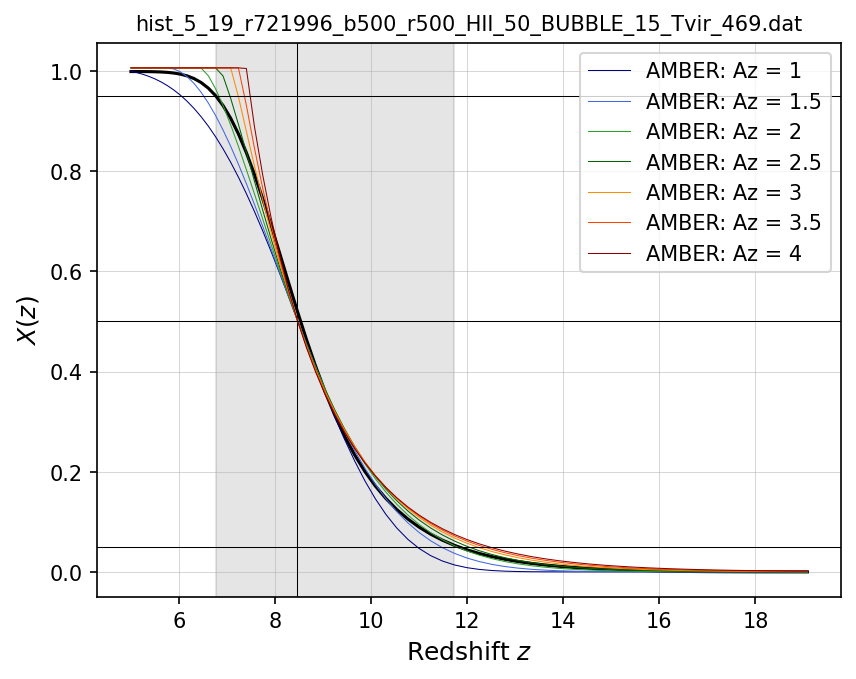

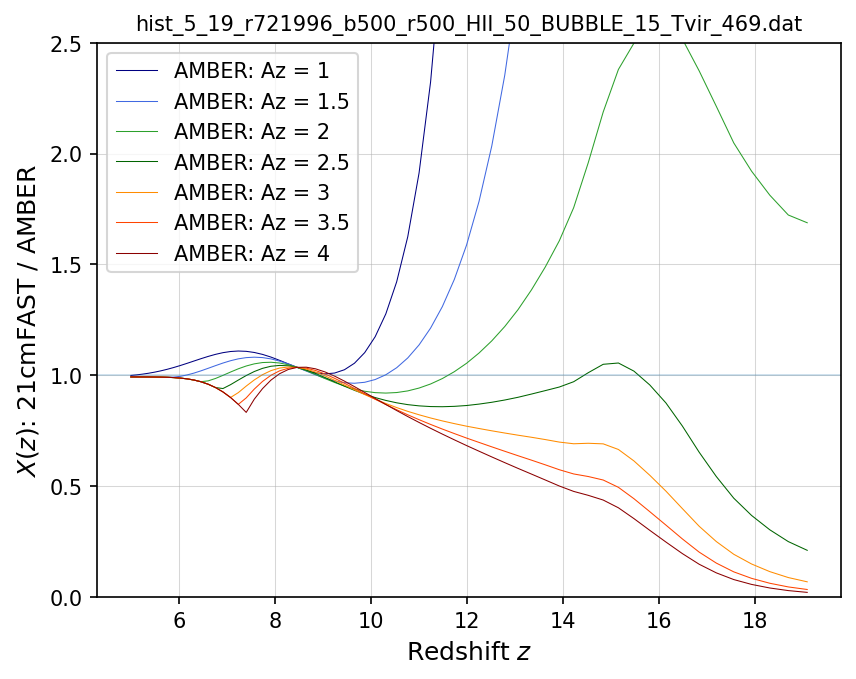


/content/drive/My Drive/kSZ Maps/21cmFAST/history_data/hist_5_19_r721996_b500_r500_HII_80_BUBBLE_15_Tvir_469.dat
	z_mid = 9.44614, delta_z = 4.94372 (z_95 = 7.56947, z_5 = 12.5132)
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre9.44614_Dz4.94372_Az2_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre9.44614_Dz4.94372_Az1.5_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre9.44614_Dz4.94372_Az3_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre9.44614_Dz4.94372_Az2.5_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nsid

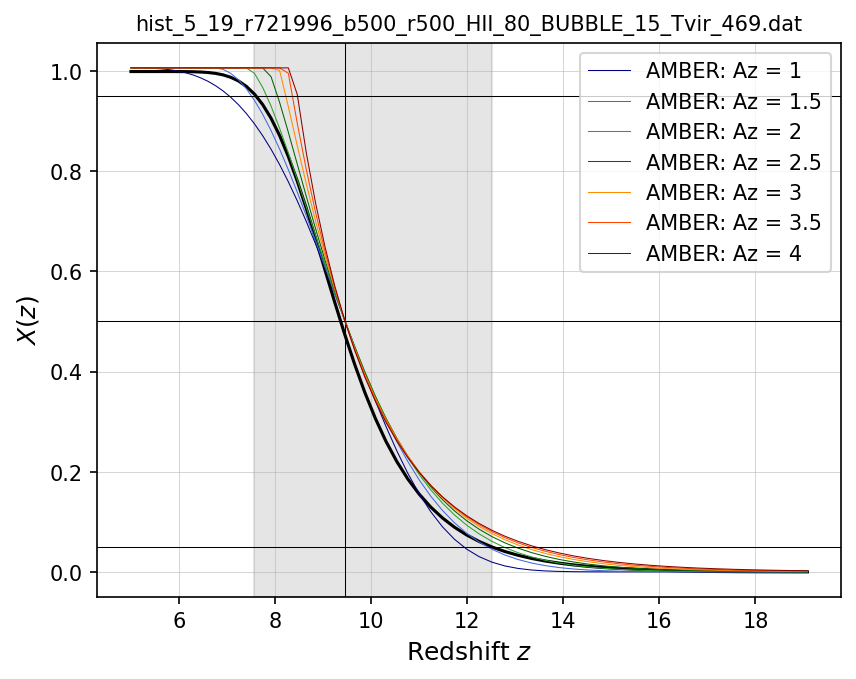

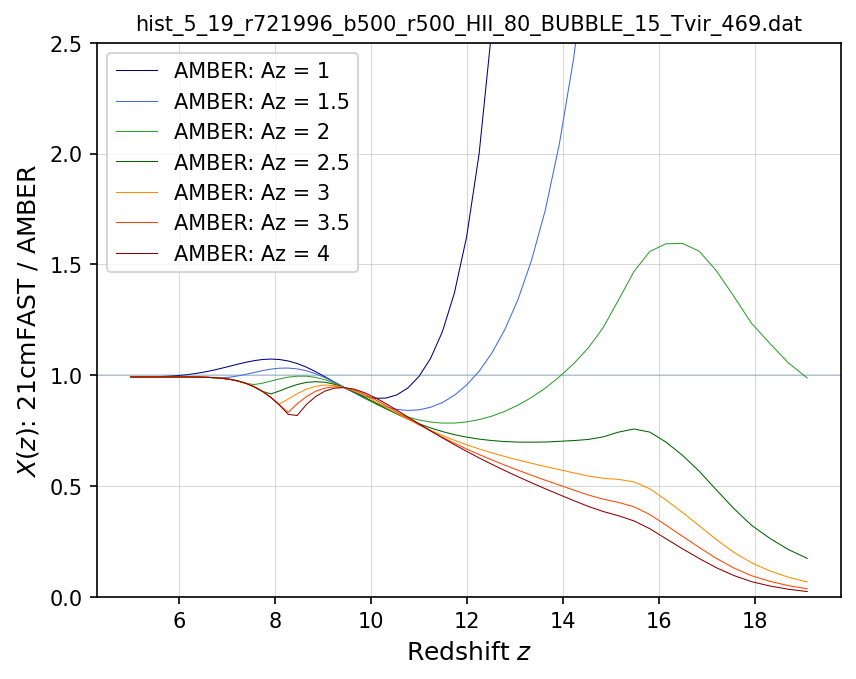


/content/drive/My Drive/kSZ Maps/21cmFAST/history_data/hist_5_19_r721996_b500_r500_HII_95_BUBBLE_18_Tvir_5.dat
	z_mid = 8.46139, delta_z = 4.32245 (z_95 = 6.91687, z_5 = 11.2393)
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.32245_Az1_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.32245_Az1.5_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.32245_Az2.5_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.32245_Az2_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8

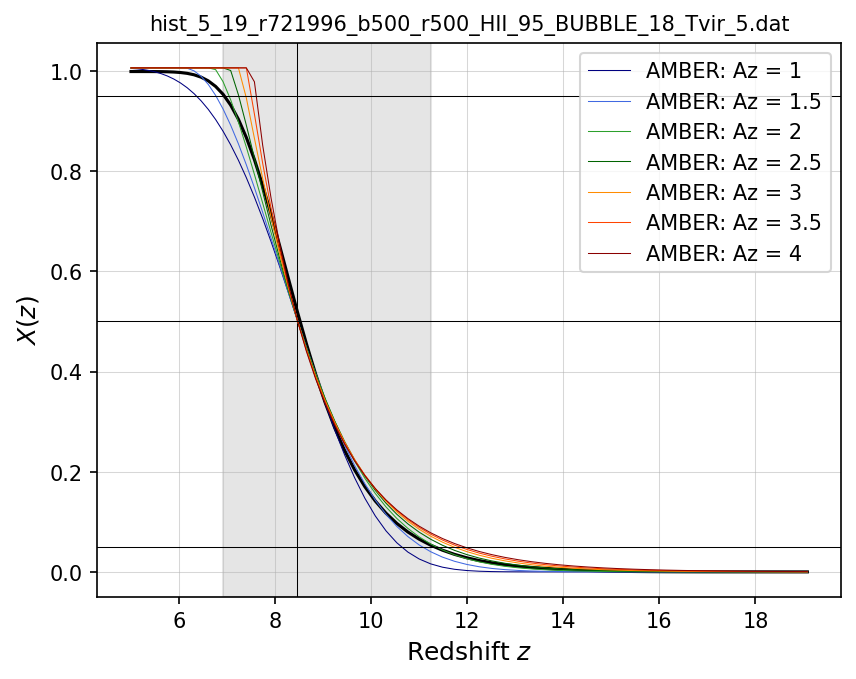

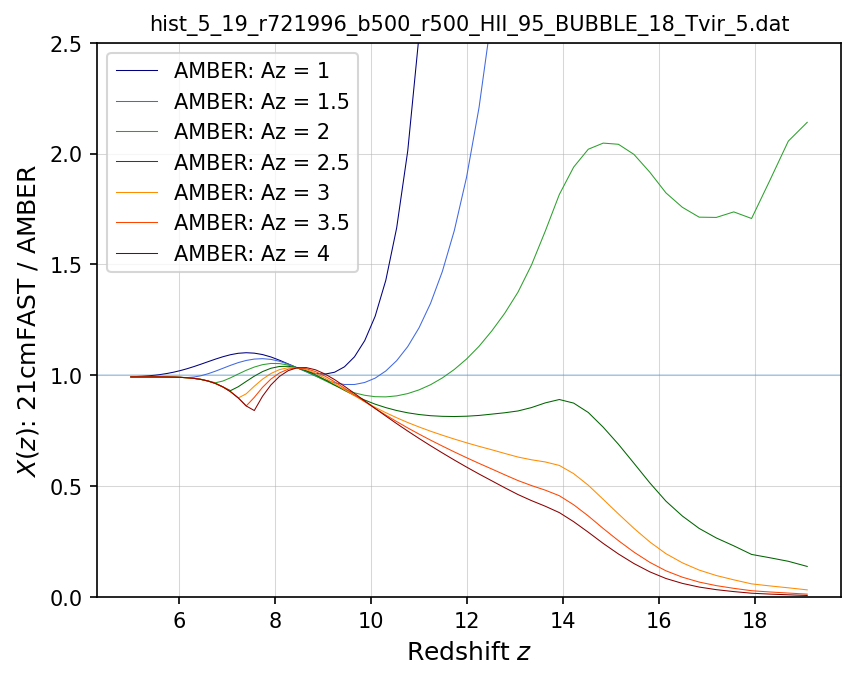


/content/drive/My Drive/kSZ Maps/21cmFAST/history_data/hist_5_19_r721996_b500_r500_HII_96_BUBBLE_18_Tvir_52.dat
	z_mid = 7.74086, delta_z = 4.36283 (z_95 = 6.17055, z_5 = 10.5334)
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre7.74086_Dz4.36283_Az2_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre7.74086_Dz4.36283_Az1_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre7.74086_Dz4.36283_Az3.5_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre7.74086_Dz4.36283_Az2.5_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside

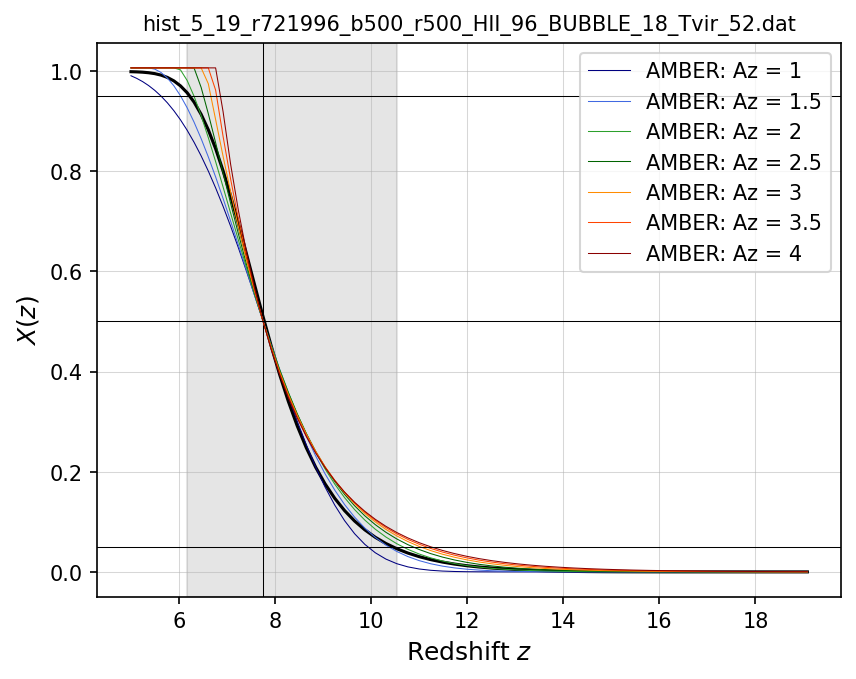

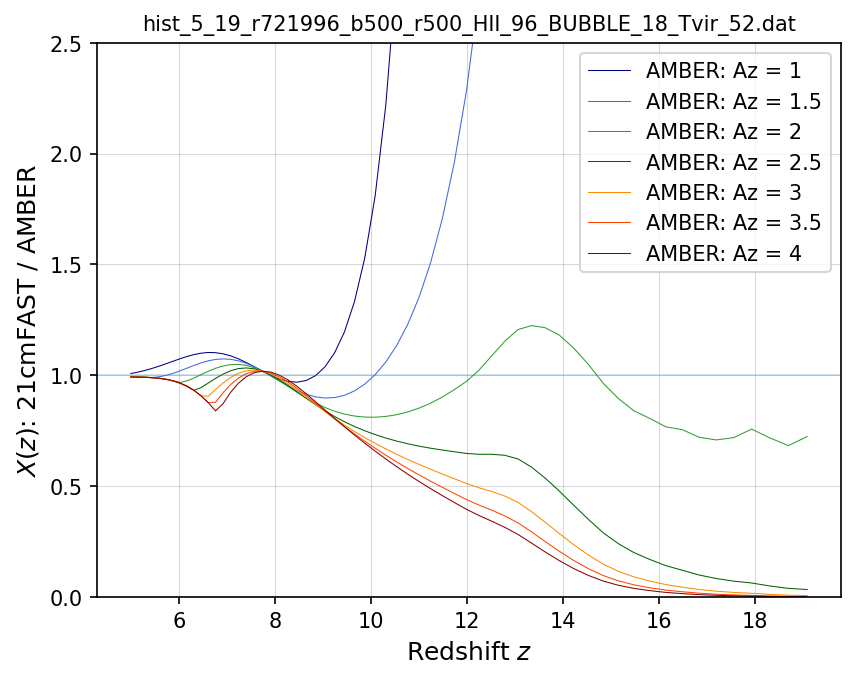


/content/drive/My Drive/kSZ Maps/21cmFAST/history_data/hist_5_19_r721996_b500_r500_HII_20_BUBBLE_15_Tvir_43.dat
	z_mid = 8.09399, delta_z = 6.07768 (z_95 = 6.17055, z_5 = 12.2482)
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.09399_Dz6.07768_Az1_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.09399_Dz6.07768_Az2_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.09399_Dz6.07768_Az1.5_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.09399_Dz6.07768_Az3_M1e+08_lamb3_nside8192/cmb/tau.txt
/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside81

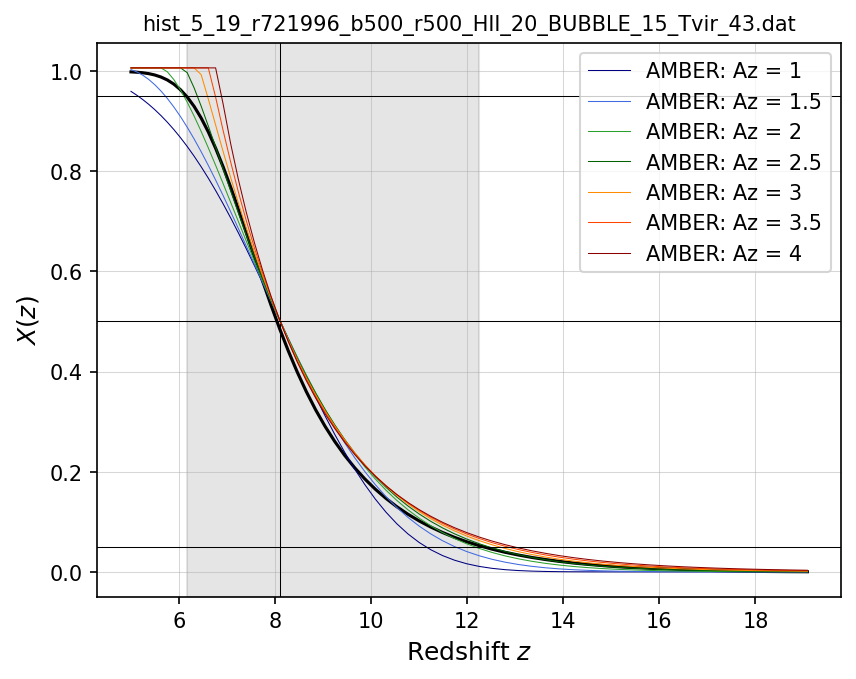

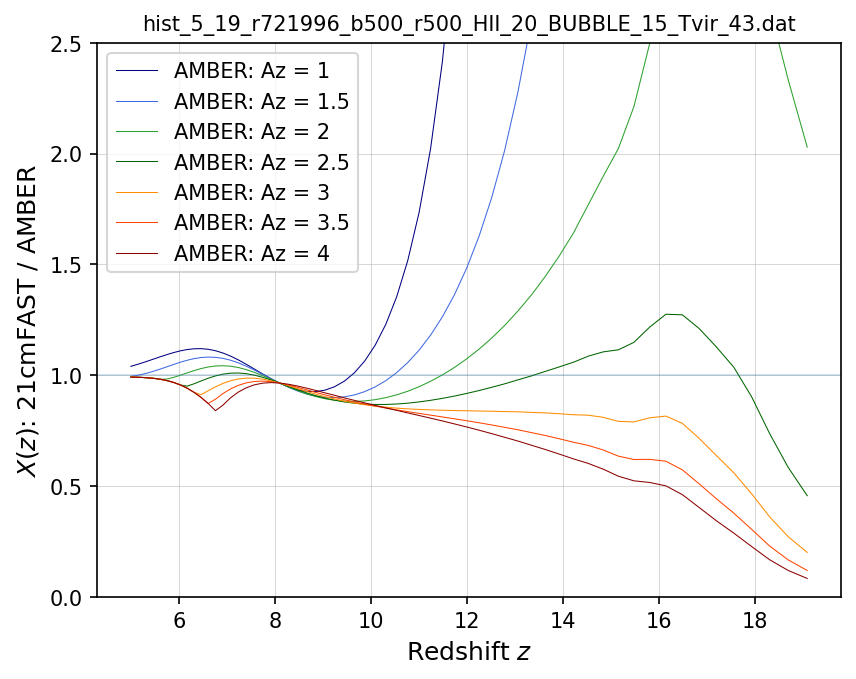

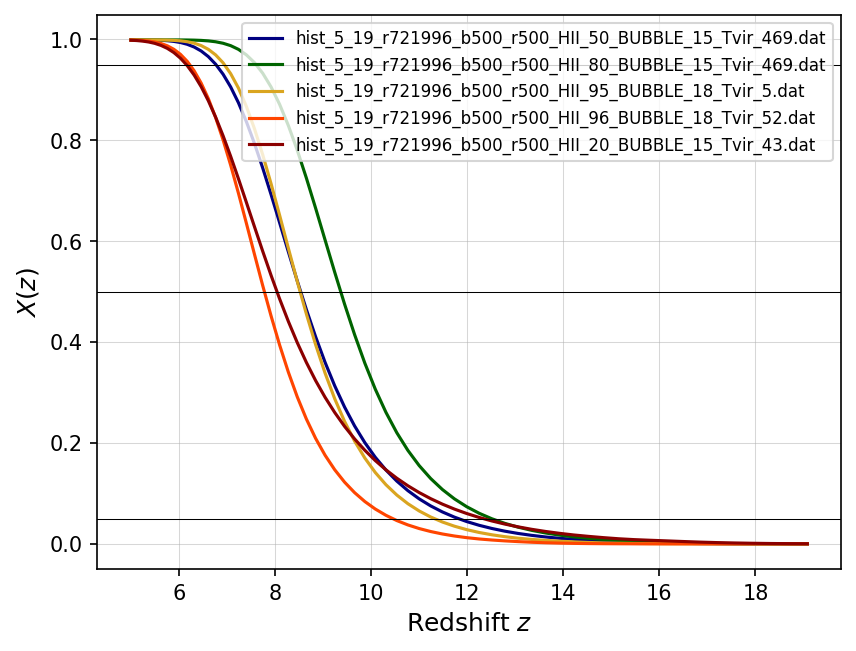

In [ ]:
parent_sim_fd = '/content/drive/My Drive/kSZ Maps/21cmFAST/history_data/'
parent_amber_sim_fd = '/content/drive/My Drive/kSZ Maps/amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/'
searchstr = '%s/*.dat' %(parent_sim_fd)
reion_21cm_fast_flist = glob.glob( searchstr )
print(len( reion_21cm_fast_flist ) )

x_z_dic = {}
for fname in reion_21cm_fast_flist:

  tmpfname = fname.split('/')[-1]#.replace('_', '\_')
  z, x_z = np.loadtxt(fname, unpack = True)
  ##print(fname, z, x_z); sys.exit()
  print('\n%s' %(fname))
  x_z /= 1.08 #remove first He reionisation.

  x_z_dic[tmpfname] = [z, x_z]


  #determine z_mid and delta_z
  z_95_val = z[np.argmin( abs(x_z - 0.95) )]
  z_50_val = z[np.argmin( abs(x_z - 0.5) )]
  z_5_val = z[np.argmin( abs(x_z - 0.05) )]
  z_mid = z_50_val
  delta_z = z_5_val - z_95_val
  print( '\tz_mid = %g, delta_z = %g (z_95 = %g, z_5 = %g)' %(z_mid, delta_z, z_95_val, z_5_val) )

  #now check if the equivalent AMBER exists
  curr_amber_fd_list_searchstr = '%s/zre%g_Dz%g_Az*_M1e+08_lamb3_nside8192' %(parent_amber_sim_fd, z_mid, delta_z)
  curr_amber_fd_list = glob.glob( curr_amber_fd_list_searchstr )
  if len(  curr_amber_fd_list ):
    amber_x_z_dic = {}
    for curr_amber_fd in curr_amber_fd_list:
      Azval = float( re.findall( 'Az[0-9.0-9]*', curr_amber_fd )[0].replace('Az', '') )
      amber_fname = '%s/cmb/tau.txt' %(curr_amber_fd)
      print(amber_fname)
      amber_rec = pd.read_csv(amber_fname, delim_whitespace=True, nrows=2500)
      amber_z = np.array(amber_rec['z'],dtype='float64')
      amber_x_z = np.array(amber_rec['x_e'],dtype='float')
      amber_x_z = amber_x_z * 1.08
      amber_x_z = np.interp( z, amber_z, amber_x_z )
      amber_x_z_dic[Azval] = amber_x_z
  else:
      amber_x_z_dic = None

  ##print(amber_x_z_dic.keys()); sys.exit()

  #plot x(z) vs z
  clf()
  fsval = 12
  plot(z, x_z, color = 'black')
  '''
  axvline(z_95_val, color = 'black', lw = 0.5)
  axvline(z_5_val, color = 'black', lw = 0.5)
  '''
  axvspan(z_5_val, z_95_val, color = 'black', alpha = 0.1)
  axvline(z_50_val, color = 'black', lw = 0.5)
  if amber_x_z_dic is not None:
    color_dic = {1: 'navy', 1.5: 'royalblue', 2: 'tab:green', 2.5: 'darkgreen', 3: 'darkorange', 3.5: 'orangered', 4: 'darkred'}
    for Azval in sorted( amber_x_z_dic ):
      amber_x_z = amber_x_z_dic[Azval]
      plot(z, amber_x_z, color = color_dic[Azval], label = r'AMBER: Az = %g' %(Azval), lw = 0.5)
    legend(loc = 1, fontsize = fsval - 2)
  axhline(0.95, color = 'black', lw = 0.5); axhline(0.05, color = 'black', lw = 0.5); axhline(0.5, color = 'black', lw = 0.5)
  xlabel(r'Redshift $z$', fontsize = fsval); ylabel(r'$X(z)$', fontsize = fsval)
  grid(True, which = 'both', axis = 'both', lw = 0.5, alpha = 0.5)
  title(r'%s' %(tmpfname), fontsize = fsval-2)

  show();

  #if AMBER exists, then make ratio plot for x(z) vs z
  if amber_x_z_dic is not None:
    clf()
    ax = subplot(111)
    for Azval in sorted( amber_x_z_dic ):
      amber_x_z = amber_x_z_dic[Azval]

      #plot(z, (x_z - amber_x_z)/x_z, color = color_dic[Azval], label = r'AMBER: Az = %g' %(Azval), lw = 0.5)
      plot(z, x_z/amber_x_z, color = color_dic[Azval], label = r'AMBER: Az = %g' %(Azval), lw = 0.5)
    xlabel(r'Redshift $z$', fontsize = fsval); ylabel(r'$X(z)$: 21cmFAST / AMBER', fontsize = fsval)
    title(r'%s' %(tmpfname), fontsize = fsval-2)
    legend(loc = 'best', fontsize = fsval - 2)
    ylim(0., 2.5)
    axhline(1., lw = 0.2)
    grid(True, which = 'both', axis = 'both', lw = 0.5, alpha = 0.5)
    show();

#also plot everything together now
clf()
color_arr = ['navy', 'darkgreen', 'goldenrod', 'orangered', 'darkred']
for tmpfnamecntr, tmpfname in enumerate( x_z_dic ):
  z, x_z = x_z_dic[tmpfname]
  plot(z, x_z, label = r'%s' %(tmpfname), color = color_arr[tmpfnamecntr])
axhline(0.95, color = 'black', lw = 0.5); axhline(0.05, color = 'black', lw = 0.5); axhline(0.5, color = 'black', lw = 0.5)
xlabel(r'Redshift $z$', fontsize = fsval); ylabel(r'$X(z)$', fontsize = fsval)
legend(loc = 1, fontsize = 8)
grid(True, which = 'both', axis = 'both', lw = 0.5, alpha = 0.5)
show();

#sys.exit()